# <b>plot</b>

This section describes various options available for xy plots in **fivecentplots**

See the full API https://endangeredoxen.github.io/fivecentplots/0.5.0/api/plot.html#plot

## Setup

Import packages

In [1]:
import fivecentplots as fcp
import pandas as pd
from pathlib import Path

### Sample data

We will use two fake datasets in this tutorial: 

1) make-believe current vs voltage data for a set of diodes [`df`] 

2) a time-series dataset for "happiness" data, derived from an undisclosed bodily orifice [`ts`].   

In [2]:
df = pd.read_csv(Path(fcp.__file__).parent / 'test_data/fake_data.csv')
df.head(10)

,Substrate,Target Wavelength,Boost Level,Temperature [C],Die,Voltage,I Set,I [A]
0,Si,450,0.2,25,"(1,1)",0.0,0.0,0.0
1,Si,450,0.2,25,"(1,1)",0.1,0.0,0.0
2,Si,450,0.2,25,"(1,1)",0.2,0.0,0.0
3,Si,450,0.2,25,"(1,1)",0.3,0.0,0.0
4,Si,450,0.2,25,"(1,1)",0.4,0.0,0.0
5,Si,450,0.2,25,"(1,1)",0.5,0.0,0.0
6,Si,450,0.2,25,"(1,1)",0.6,0.0,0.0
7,Si,450,0.2,25,"(1,1)",0.7,0.0,0.0
8,Si,450,0.2,25,"(1,1)",0.8,0.0,0.0
9,Si,450,0.2,25,"(1,1)",0.9,0.0,0.0


In [3]:
ts = pd.read_csv(Path(fcp.__file__).parent / 'test_data/fake_ts.csv')
ts.head()

,Date,Happiness Quotient
0,1/1/2015,16.088954
1,1/2/2015,18.186724
2,1/3/2015,35.744313
3,1/4/2015,38.134045
4,1/5/2015,46.147279


Optionally set the design theme (skipping here and using default):

In [4]:
#fcp.set_theme('gray')
#fcp.set_theme('white')

## Basic XY Plots

### Scatter

A simple XY plot of current vs voltage is shown below for a sample set of fake diodes.

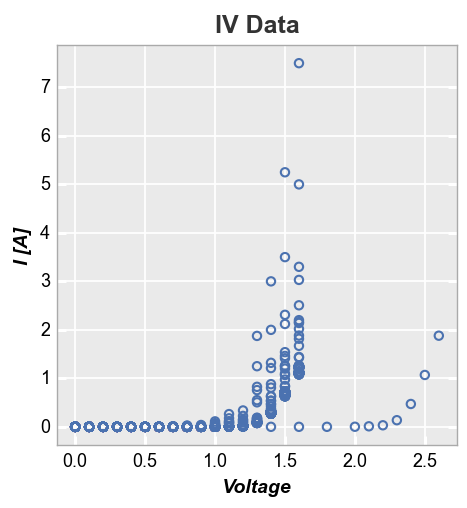

In [5]:
fcp.plot(df, x='Voltage', y='I [A]', title='IV Data', lines=False)

For better visibility, we can subset the data to show only diodes that meet certain criteria.  This is accomplished using the `filter` kwarg from <b>fivecentplots</b>:

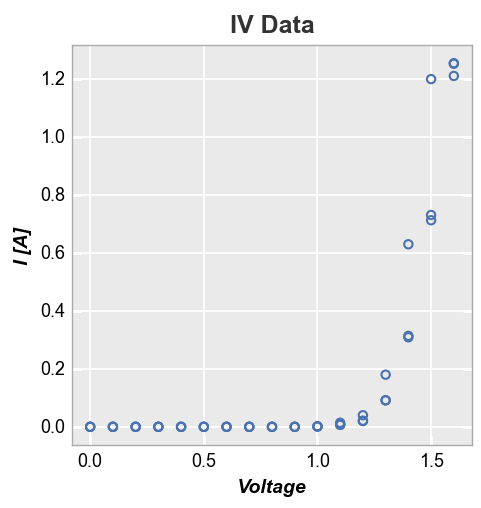

In [6]:
fcp.plot(df, x='Voltage', y='I [A]', title='IV Data', lines=False, 
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25')

<div class="admonition note">
<p class="admonition-title"></p>
<p>In the example above, we are selecting specific data based on values in four different DataFrame columns ("Substrate", "Target Wavelength", "Boost Level", and "Temperature").  This is conveniently achieved using <b>fivecentplots</b>'s built-in `filter` tool, which uses an easy, human-readable string to sub-sample a dataset.  Alternatively, could also have applied filtering directly to the input DataFrame as shown below, but this feels a bit cumbersome:
    
`df_sub = df[(df['Substrate']=="Si")&(df['Target Wavelength']==450)&(df['Boost Level']==0.2)&(df['Temperature [C]']==25)]`
    
Read more about <b>fivecentplots</b> filtering <a href=filter.html>here</a>.</p>
</div>

### Legend

Our sampled data set actually contains IV data for three different diodes, which are named based on their coordinates on a Si wafer.  To easily separate them, we add a legend using the column "Die".  Because we are now grouping each die individually, we enable the connecting lines between points.

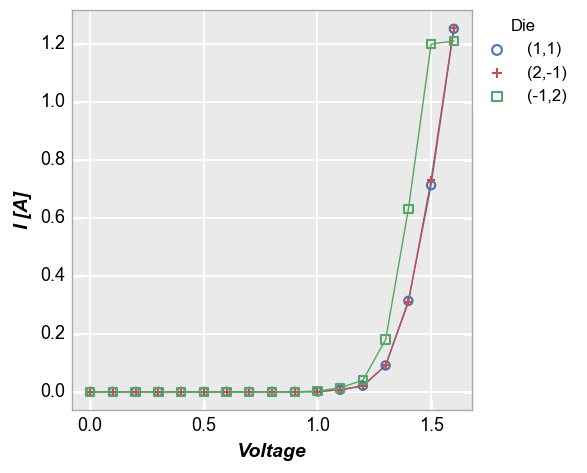

In [7]:
fcp.plot(df, x='Voltage', y='I [A]', legend='Die', 
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25')

By default, the values in the legend are sorted using so-called "natural" sorting via the ``natsort`` library.  To disable this and order the legend based on the order in which the group was actually found in the dataframe, add the keyword ``sort=False``:

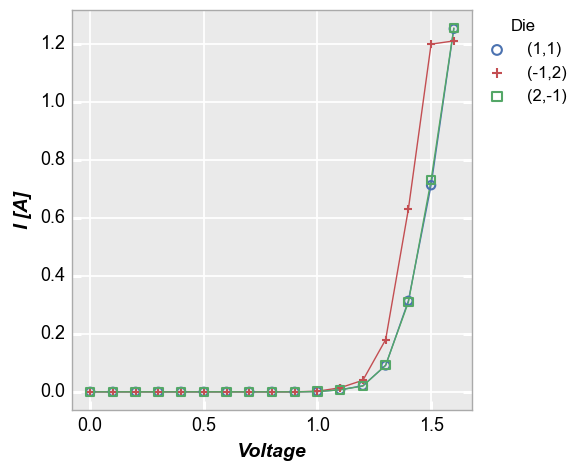

In [8]:
fcp.plot(df, x='Voltage', y='I [A]', legend='Die', sort=False,
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25')

### Axes scales

Log- and other-scaled axes can be enabled through the kwarg ``ax_scale``.  Valid options:
<ul>
<li>x-only: <font color="blue" style="font-family:'Courier New'"> logx | semilogx </font></li>
<li>y-only: <font color="blue" style="font-family:'Courier New'"> logy | semilogy </font></li>
<li>both: <font color="blue" style="font-family:'Courier New'"> loglog | log </font></li>
<li>symlog: <font color="blue" style="font-family:'Courier New'"> symlog </font> </li>
<li>logit: <font color="blue" style="font-family:'Courier New'"> logit </font></li>
</ul>

Consider the legend plot from above, now with <i>log-log</i> axes:

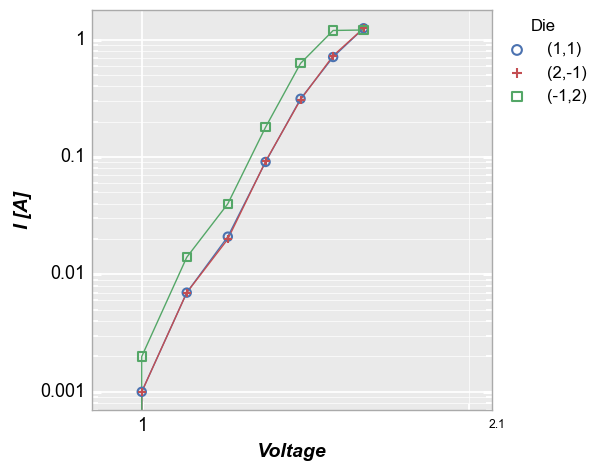

In [9]:
fcp.plot(df, x='Voltage', y='I [A]', ax_scale='loglog', legend='Die', xmin=0.9, xmax=2.1, grid_minor=True,
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25')

### Categorical labels

Categorical DataFrame columns can also be plotted on x and/or y axes.  In this example, we take the current values for each of the 3 diodes above at a voltage of 1.5V (using ``filter``) and plot the die location coordinates on the x-axis:

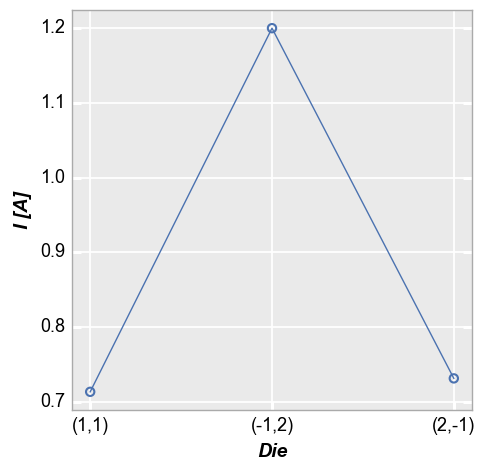

In [10]:
fcp.plot(df, x='Die', y='I [A]', filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25 & Voltage==1.5')

### Time series

We can also use ``plot`` to visualize time series data.  In this example, we use the ``ts`` dataset loaded previously and place the "Date" column on the x-axis.  For clarity, we disable markers and widen the horizontal size of the plot area.

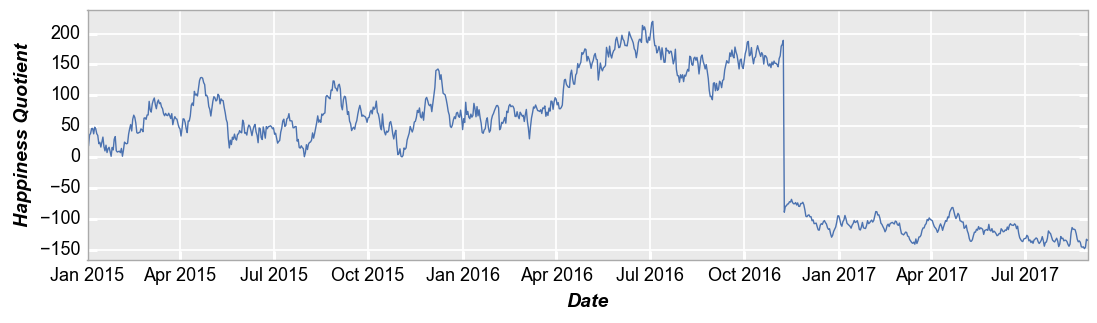

In [11]:
fcp.plot(ts, x='Date', y='Happiness Quotient', markers=False, ax_size=[1000, 250])

## Secondary axes

Secondary x- and y-axes can be added to an xy plot using the ``twin_[x|y]`` keyword.  We must also provide an additional DataFrame column name for the alternate axes to the kwarg for the axis that is not twinned (i.e., `twin_x` means two column names are required for `y` and `twin_y` means two column names are required for `x`). Lines and markers will be colored to match the axis label.  Grid lines default to the primary axis but secondary gridlines can also be enabled as shown below.

<div class="admonition note">
<p class="admonition-title"></p>
<p>Note: kwargs related to the primary axes are suffixed with `_x` or `_y`.  Keywords related to the secondary axis are suffixed with `_x2` and `_y2`.</p>
</div>

### Shared x-axis (twin_x)

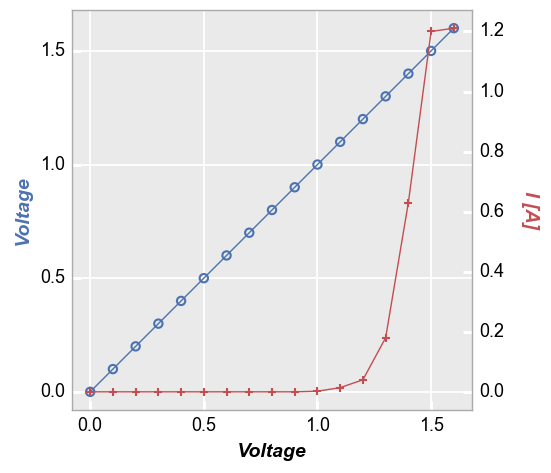

In [12]:
fcp.plot(df, x='Voltage', y=['Voltage', 'I [A]'], twin_x=True, 
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25 & Die=="(-1,2)"')

Next, the same plot but with a legend enabled.  Note that the legend will describe the value from the ``legend`` column and the value associated with the curve (either the primary or the secondary axis):

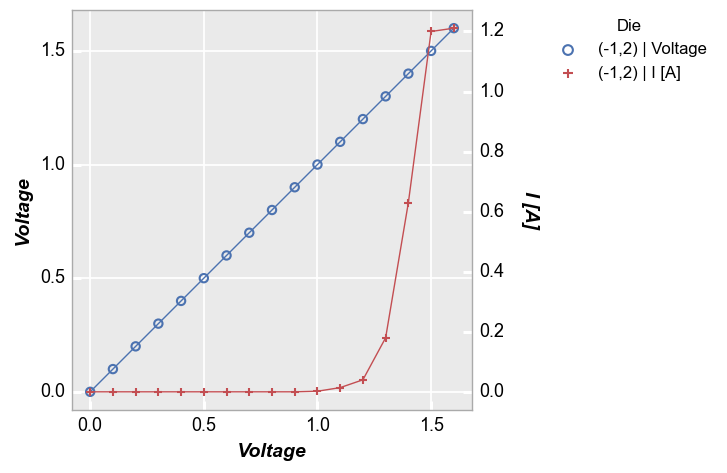

In [13]:
fcp.plot(df, x='Voltage', y=['Voltage', 'I [A]'], twin_x=True, legend='Die',
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25 & Die=="(-1,2)"')

Next, the same plot but with secondary gridlines enabled:

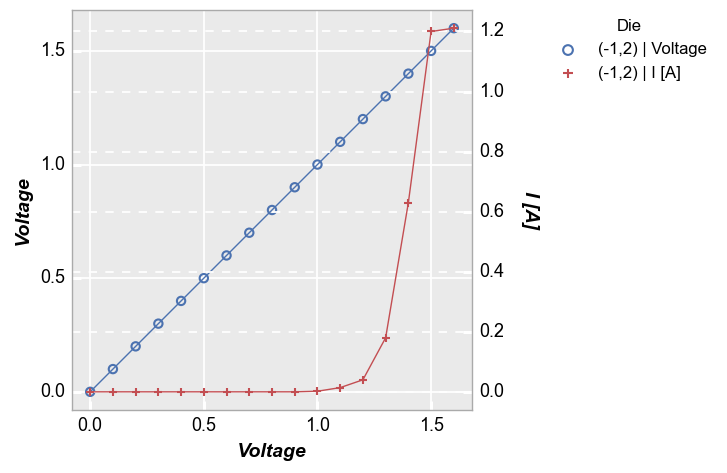

In [14]:
fcp.plot(df, x='Voltage', y=['Voltage', 'I [A]'], twin_x=True, legend='Die', 
         grid_major_y2=True, grid_major_y2_style='--', 
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25 & Die=="(-1,2)"')

### Shared y-axis (twin_y)

We can also twin the y-axis and plot two different ``x`` columns:

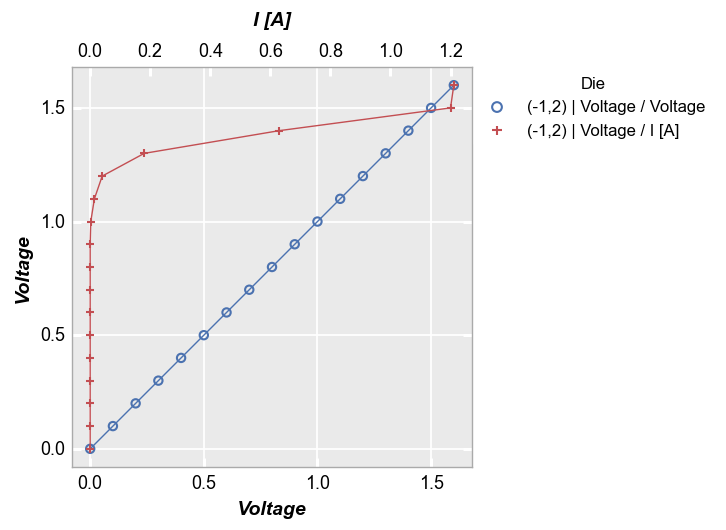

In [15]:
fcp.plot(df, x=['Voltage', 'I [A]'], y='Voltage', legend='Die', twin_y=True, 
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25 & Die=="(-1,2)"')

## Multiple x & y values

Instead of sharing (or twinning) one <i>independent</i> axis across a primary and secondary <i>dependent</i> axis, we can plot multiple columns of data on the same dependent axis.  In this case, all dependent values share the same limits on the plot.

### Multiple y only

If we supply a list of column names for keyword ``y``, we can plot both response values on the same axis.  The y-axis label is automatically updated to list all column names in use (this can be overridden using keyword ``label_y``).  Legend values are automatically updated to designate which response column applies to each curve.

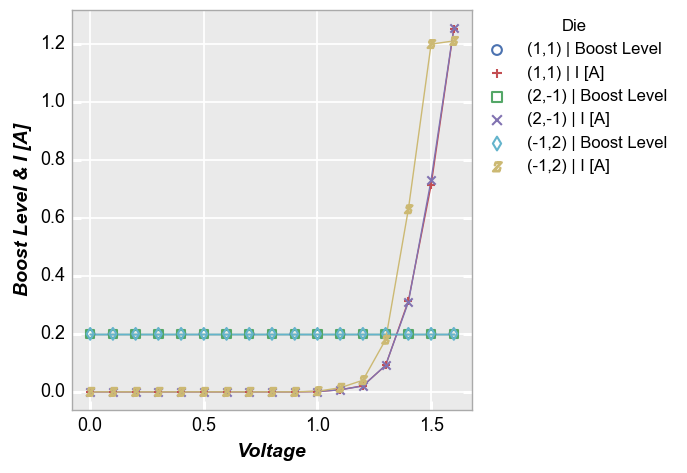

In [16]:
fcp.plot(df, x='Voltage', y=['Boost Level', 'I [A]'], legend='Die', 
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25')

And with a custom `label_y`:

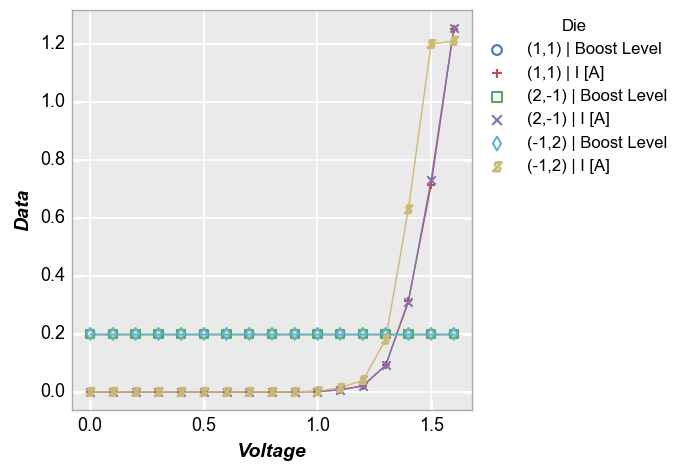

In [17]:
fcp.plot(df, x='Voltage', y=['Boost Level', 'I [A]'], legend='Die', label_y='Data',
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25')

### Multiple x only

We can do the same thing with the x-axis:

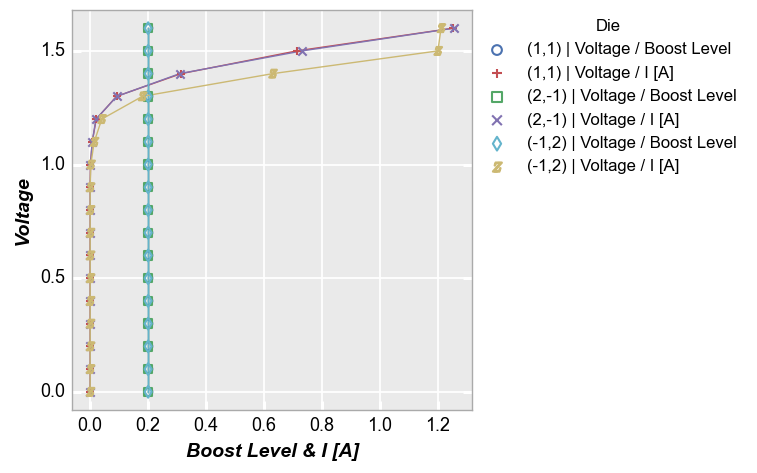

In [18]:
fcp.plot(df, x=['Boost Level', 'I [A]'], y='Voltage', legend='Die', 
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25')

### Multiple x and y

We can also add multiple columns to <b>both</b> ``x`` and ``y`` kwargs:

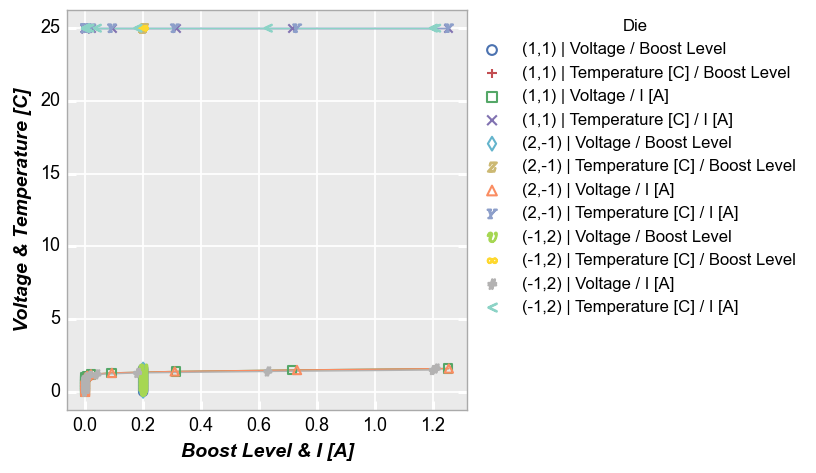

In [19]:
fcp.plot(df, x=['Boost Level', 'I [A]'], y=['Voltage', 'Temperature [C]'], legend='Die', 
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25')

## Grouping

As explained in <a href='grouping.html'>Grouping data</a>, we can group xy plots based on other DataFrame columns to better visualize a dataset.  Grouping options include:

* ``row``: a single column of subplots
* ``column``: a single row of subplots
* ``row`` x ``column``: a 2D grid of subplots based on two different DataFrame columns
* ``wrap``: a 2D grid of subplots wrapped in sequence (based on one or more DataFrame columns)

These grouped plots share a legend (if enabled) and will share common ranges unless sharing is explicity disabled

### Row plot

Row plots create multiple subplots in a single column.  Each unique value in the DataFrame column provided for keyword ``row`` creates a new row in the subplot grid.  Plot order is defined alphabetically from top to bottom.  Each row contains a row label indicating the unique value of the ``row`` column.  

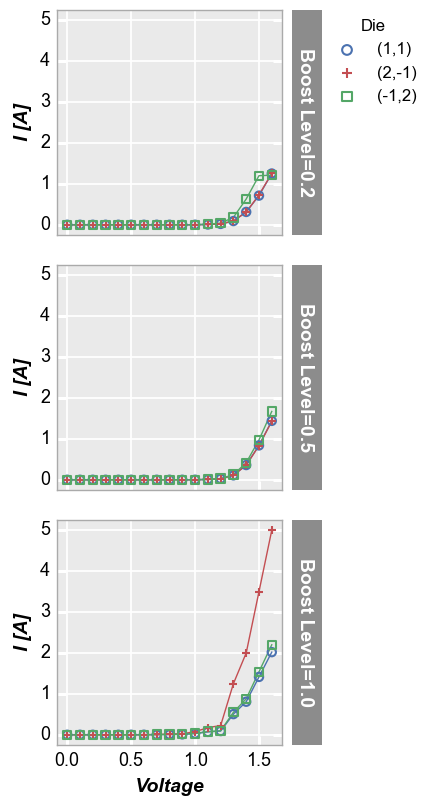

In [20]:
fcp.plot(df, x='Voltage', y='I [A]', legend='Die', row='Boost Level', ax_size=[225, 225], 
         filter='Substrate=="Si" & Target Wavelength==450 & Temperature [C]==25')

### Column plot

Column plots create multiple subplots in a single row.  Each unique value in the DataFrame column provided for keyword ``col`` creates a new column in the subplot grid.  Plot order is defined alphabetically from left to right.  Each column contains a column label indicating the unique value of the ``col`` column.  

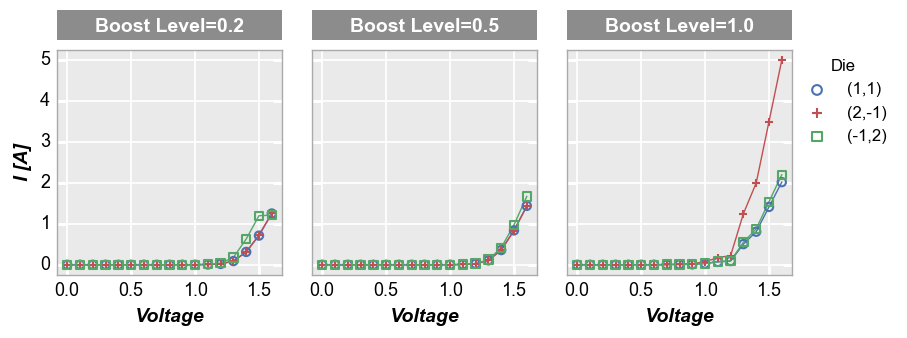

In [21]:
fcp.plot(df, x='Voltage', y='I [A]', legend='Die', col='Boost Level', ax_size=[225, 225], 
         filter='Substrate=="Si" & Target Wavelength==450 & Temperature [C]==25')

### Row x column grid

If we provide DataFrame column names for both ``row`` and ``col`` keywords, we create a grid of subplots where each combination of unique values is used to make a subplot.

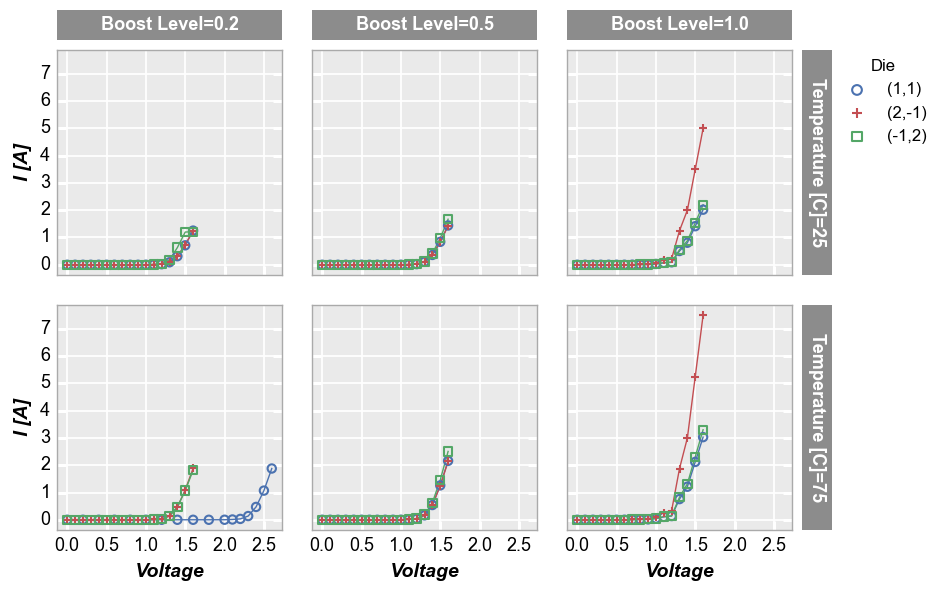

In [22]:
fcp.plot(df, x='Voltage', y='I [A]', legend='Die', col='Boost Level', row='Temperature [C]', 
         ax_size=[225, 225], filter='Substrate=="Si" & Target Wavelength==450', label_rc_font_size=13)

### Wrap plot

A wrap plot is an alternate view of the row by column grid.  For wrap plots, each subplot contains the unique values or combination of values from one or more DataFrame columns.  The actual values plotted are condensed into a single label above each plot window.  By default, spacing between plots is removed, unlike the row x column grouping option (this default can be overriden by keyword ``ws_col``).  Additionally, the default number of columns in this grid are determined by the square root of the total number of subplot windows.  However, the number of columns in a wrap plot can be controlled via keyword ``ncol``.  In wrap plots, x and y axes ranges must be shared.

Default number of columns:

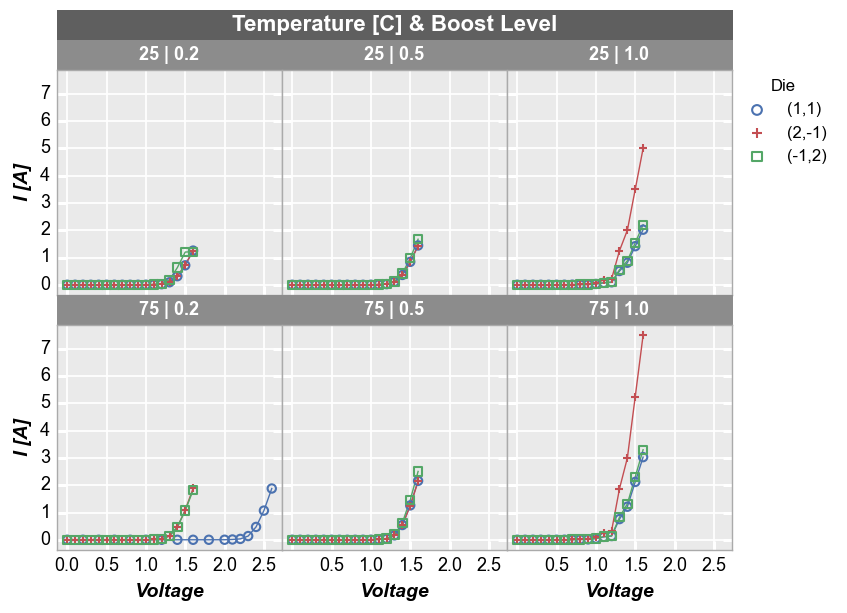

In [23]:
fcp.plot(df, x='Voltage', y='I [A]', legend='Die', wrap=['Temperature [C]', 'Boost Level'],
         ax_size=[225, 225], filter='Substrate=="Si" & Target Wavelength==450', label_rc_font_size=13)

Custom number of columns:

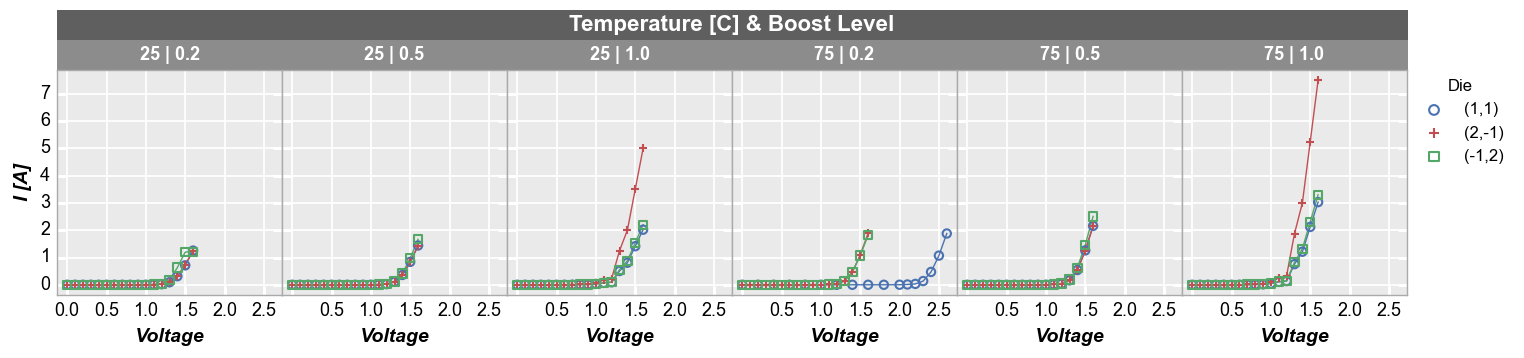

In [24]:
fcp.plot(df, x='Voltage', y='I [A]', legend='Die', wrap=['Temperature [C]', 'Boost Level'], ncol=6,
         ax_size=[225, 225], filter='Substrate=="Si" & Target Wavelength==450', label_rc_font_size=13)

## Other options

Several additional options available to enhance data analysis in xy plots are describe below.  

### Horizontal & vertical lines

We can add horizontal and vertical reference lines to a plot using one or more of the following keywords: `ax_hlines`, `ax_vlines`, `ax2_hlines`, `ax2_vlines` where "h" stands for "horizontal", "v" stands for "vertical", "ax" stands for primary axes, and "ax2" stands for secondary axes (if they exists).  The keywords except several different types of inputs:

* a single float number

* a list of float numbers

* or a variable-length list of tuples (only first value is required):
    
    * item 1 (required) = x or y axis value of the line or the name of a DataFrame column from which the first entry in the column will be used
    
    * item 2: line color
    
    * item 3: line style
    
    * item 4: line width
    
    * item 5: line alpha
    
    * item 6: legend text (added automatically is using a DataFrame column name for the value)
    

First we add a single horizontal and vertical line using default styles (determined by the current theme):

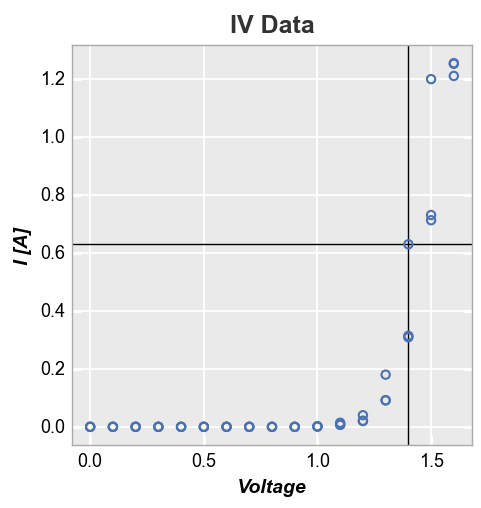

In [25]:
fcp.plot(df, x='Voltage', y='I [A]', title='IV Data', lines=False, legend=True,
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25',
         ax_hlines=0.63, ax_vlines=1.4)

Next we plot multiple horizontal and vertical lines at the same time and use the tuple formulation to style them independently (note one line contains the tuple value for legend name and thus is shown in the legend):

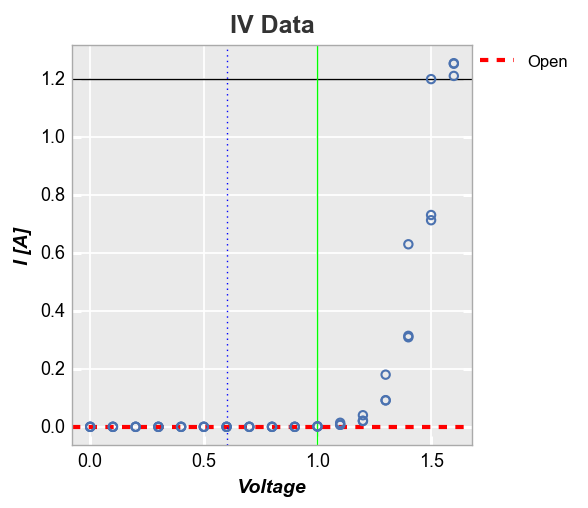

In [26]:
fcp.plot(df, x='Voltage', y='I [A]', title='IV Data', lines=False, legend=True,
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25',
         ax_hlines=[(0, '#FF0000', '--', 3, 1, 'Open', '#555555', 0.25), 1.2], 
         ax_vlines=[(0.6, '#0000ff', ':'), (1, '#00FF00')])

We can also plot ax_lines using data from a DataFrame column.  Below we define a new column and plot the value from the <i>first row</i> as a horizontal line:

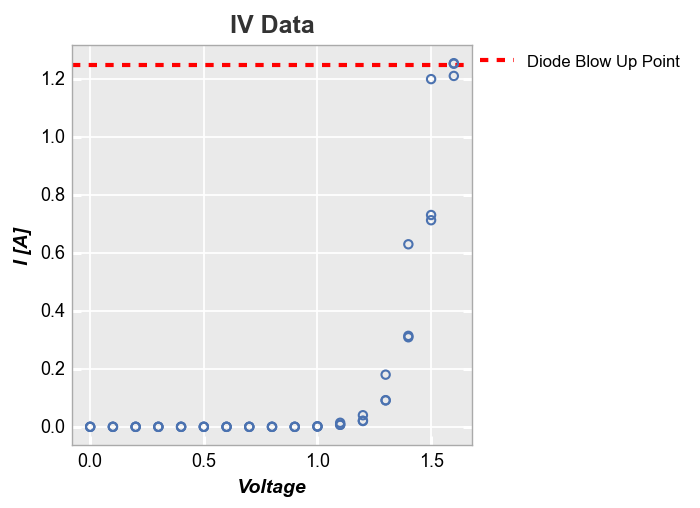

In [27]:
df['Diode Blow Up Point'] = 1.25
fcp.plot(df, x='Voltage', y='I [A]', title='IV Data', lines=False, legend=True,
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25',
         ax_hlines=[('Diode Blow Up Point', '#FF0000', '--', 3, 1)])

### Curve fitting

<b>fivecentplots</b> provide automatic curve fitting using kwargs starting with `fit`.  The value of fit specifies the degree and style parameters follow the normal pattern but are prefixed by ``fit_``.  We can display the fit equation and R^2 values via keywords ``fit_eqn=True`` and ``fit_rsq==True``, respectively.  By default, a legend is displayed to designate the style of the fit line (this can be disabled by supplying keyword ``legend=False``).

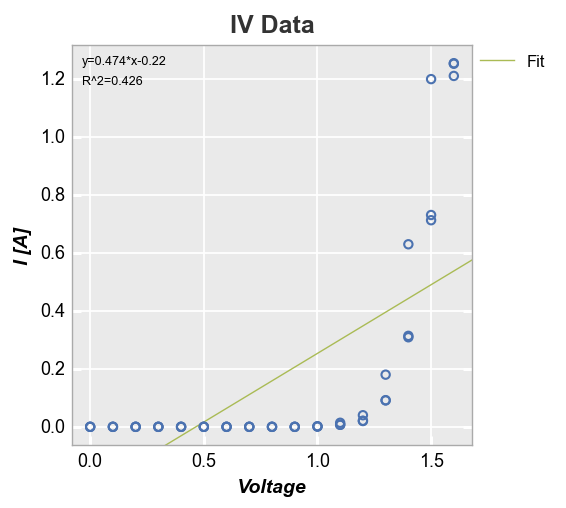

In [28]:
fcp.plot(df, x='Voltage', y='I [A]', title='IV Data', lines=False, 
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25',
         fit=1, fit_eqn=True, fit_rsq=True, fit_font_size=9, fit_color='#AABB55')

Since this fit is garbage, let's make it a polynomial of degree 5.  We'll also disable the legend just because:

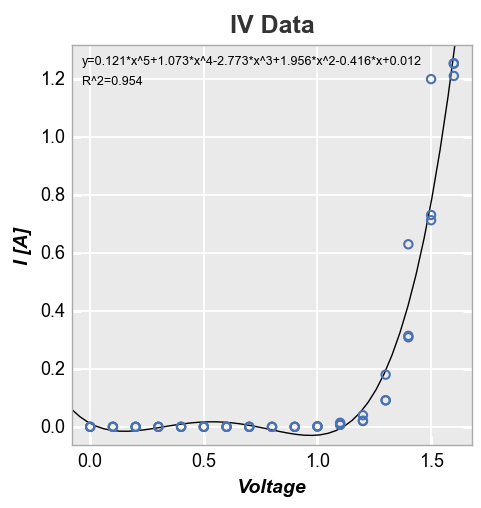

In [29]:
fcp.plot(df, x='Voltage', y='I [A]', title='IV Data', lines=False, legend=False,
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25',
         fit=5, fit_eqn=True, fit_rsq=True, fit_font_size=9)

Let's return to our linear fit example.  After about Voltage = 1.3V, the response looks somewhat linear.  We can constrain the region of interest for the fit by supplying a start and stop value to the keywords `fit_range_x` (which selects data points that fall within this range on the x-axis) or `fit_range_y` (which selects data points that fall within this range on the y-axis).  The R^2 of this fit looks much better than before.

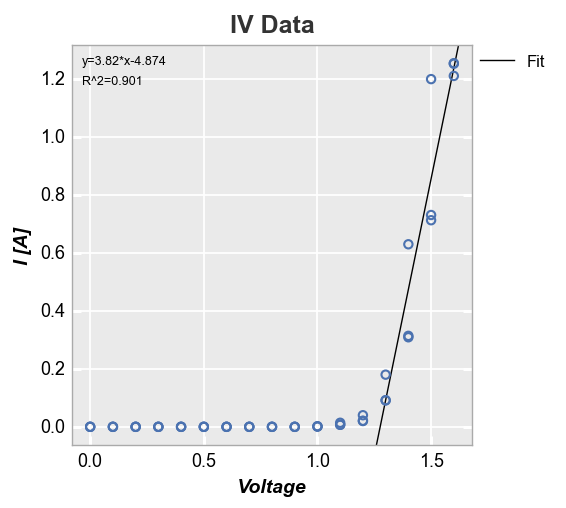

In [30]:
fcp.plot(df, x='Voltage', y='I [A]', title='IV Data', lines=False, 
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25',
         fit=1, fit_eqn=True, fit_rsq=True, fit_font_size=9, fit_range_x=[1.3, 2])

In the case of multiple datasets, we can also add a line of fit for each item in a legend by specifying a DataFrame column in the ``legend`` keyword:

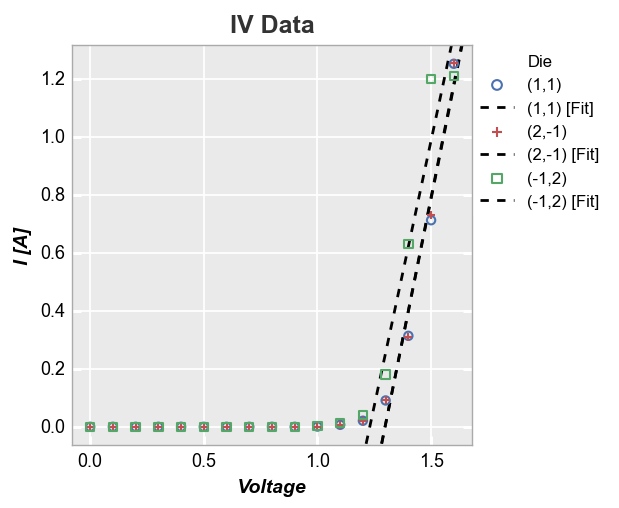

In [31]:
fcp.plot(df, x='Voltage', y='I [A]', title='IV Data', lines=False, legend='Die', 
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25',
         fit=1, fit_range_x=[1.3, 2], fit_width=2, fit_style='--')

Fits also work with subplot grouping:

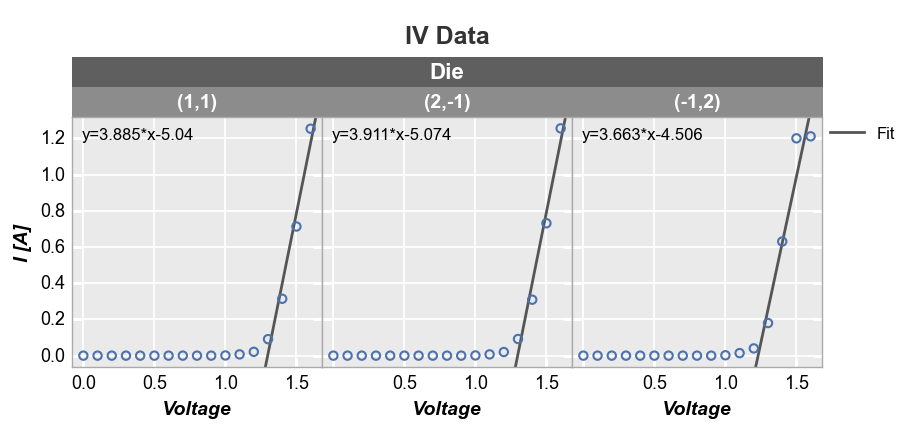

In [32]:
fcp.plot(df, x='Voltage', y='I [A]', title='IV Data', lines=False, wrap='Die', ncol=3,
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25',
         fit=1, fit_range_x=[1.3, 2], fit_eqn=True, fit_width=2, fit_color='#555555', ax_size=[250, 250])

### Stat lines

If lines are enabled in an xy plot, they are drawn from point to point based on the order in which they appear in a DataFrame column.  If multiple groups are included in the dataset and not separated by grouping or legending, the lines will circle back on each other (from the end of one group to the start of the next) as shown below:

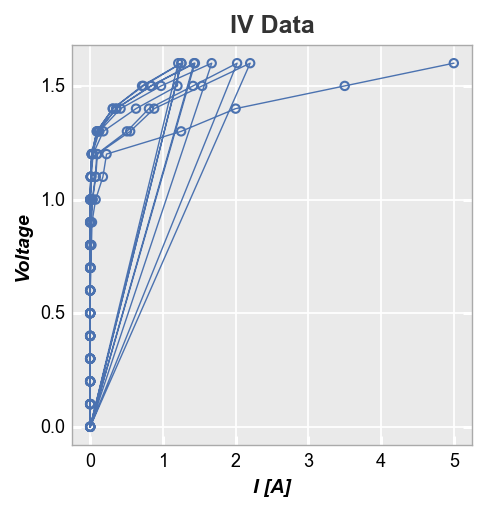

In [33]:
fcp.plot(df, x='I [A]', y='Voltage', title='IV Data', 
         filter='Substrate=="Si" & Target Wavelength==450 & Temperature [C]==25')

One option to deal with this is to sort the DataFrame by x-value.  Unfortunately, this can result in a very jagged mess as lines are drawn between points with similar x-value but different y-value.

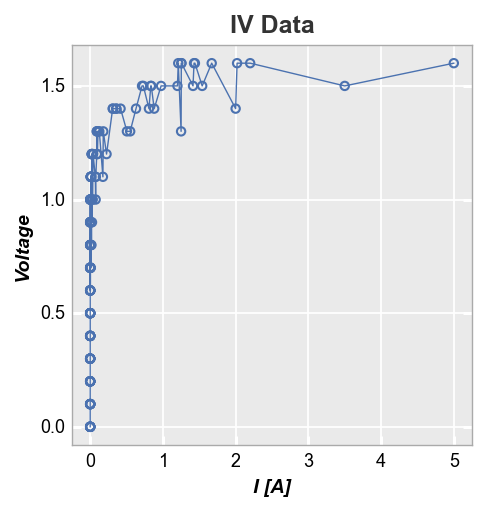

In [34]:
df2 = df.copy()
df2 = df2.sort_values('I [A]')
fcp.plot(df2, x='I [A]', y='Voltage', title='IV Data', 
         filter='Substrate=="Si" & Target Wavelength==450 & Temperature [C]==25')

Rather than drawing connecting lines between all points, <b>fivecentplots</b> allows you to select a representative statistic of the data at each value (such as the median) and plot a line based on this value instead.  This is accomplished using the `stat` keyword (any stats that can be applied to a pandas `groupby` object are valid).  

First consider a plot of Voltage vs Current with a "mean" stat line.  The result is clean because the voltage values in our dataset are at fixed and common values between datasets.  

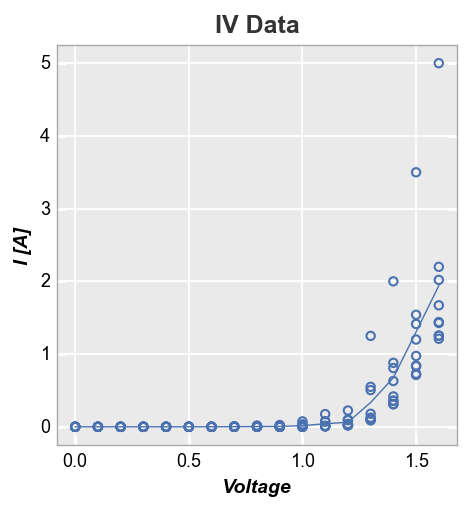

In [35]:
fcp.plot(df, y='I [A]', x='Voltage', title='IV Data', stat='mean', 
         filter='Substrate=="Si" & Target Wavelength==450 & Temperature [C]==25')

Alternatively, if we plot Current vs Voltage, our mean stat line becomes jagged and nasty.  This is due to the fact that the current values for each voltage point vary between datasets.  This is not any better than just plotting a simple connecting line between points.  

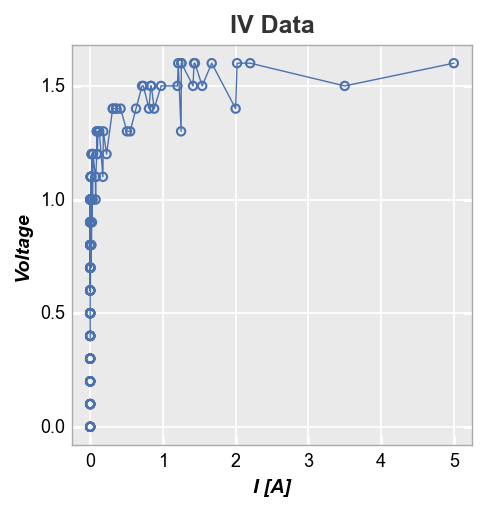

In [36]:
fcp.plot(df, x='I [A]', y='Voltage', title='IV Data', stat='mean',
         filter='Substrate=="Si" & Target Wavelength==450 & Temperature [C]==25')

For cases where the x-values are not identical and have some jitter from one dataset to the next, you can use the keyword `stat_val` and specify an alternative DataFrame column to use for the statistical calculation (the actual plotted x-axis will still be whatever is specified for the `x` keyword).  Here we use a column called "I Set" which represents the setpoint current while "I [A]" represents the <i>actual</i> measured current.  We still have some jaggedness in the stat line but it is now representative of the actual dataset and not overwhelmed by minor jitter in the x-values.

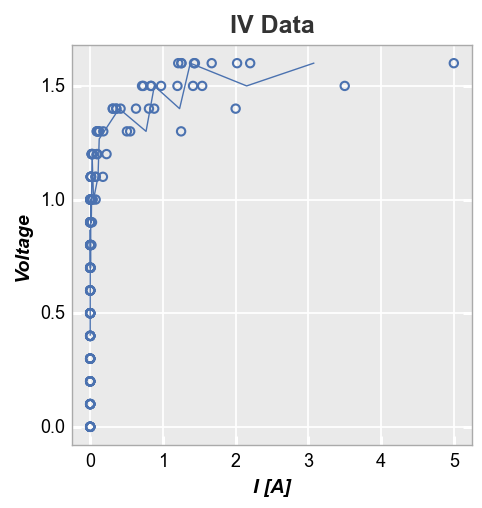

In [37]:
fcp.plot(df, x='I [A]', y='Voltage', title='IV Data', stat='mean', stat_val='I Set',
         filter='Substrate=="Si" & Target Wavelength==450 & Temperature [C]==25')

Stat lines also work with multiple DataFrame columns are plotted on a given axis.  For example, consider the following with two values on the y-axis:

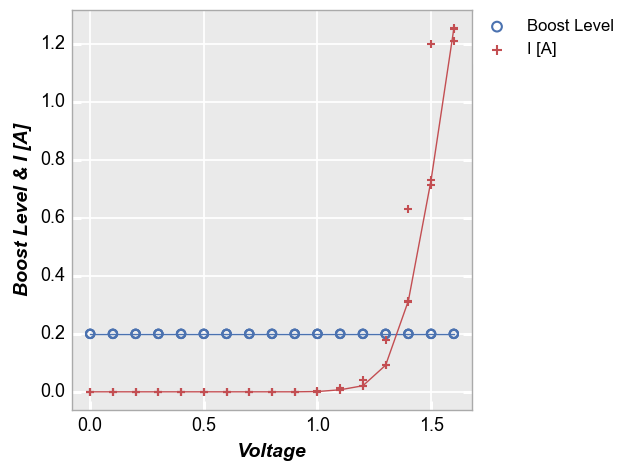

In [38]:
fcp.plot(df, x='Voltage', y=['Boost Level', 'I [A]'], legend=True, stat='median', 
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25')

### Confidence intervals

<b>fivecentplots</b> can display confidence intervals around a data set.  Three different methods are available to calculate these intervals:

* ``conf_int``: upper and lower bounds based on a single confidence value between 0-1 (typical = 0.95)
* ``perc_int``: upper and lower bounds based on percentiles between 0-1
* ``nq_int``: upper and lower bounds based on values of sigma (where the mean of a distribution is sigma=0)

By default these intervals are shown as partially transparent filled regions around a curve.  These intervals are calculated point-by-point so they are different than confidence bands that are computed from a regression.  These intervals are useful mainly for datasets where multiple points exist at each x-value.

To demonstrate this feature we will use a special dataset:

In [39]:
df_interval = pd.read_csv(Path(fcp.__file__).parent / 'test_data/fake_data_interval.csv')
df_interval.head()

,x,y
0,-1.0,-10.715459
1,-1.0,-9.972410
2,-1.0,-30.740532
3,-1.0,-31.368963
4,-1.0,-29.058633


First we show the 95% confidence interval:

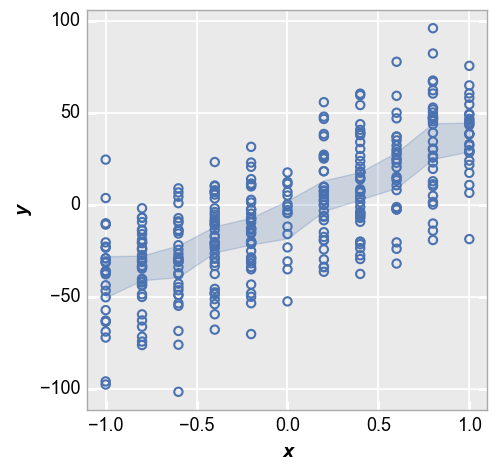

In [40]:
fcp.plot(df_interval, x='x', y='y', lines=False, conf_int=0.95)

Next we show the IQR around each point based on the 25th and 75th percentiles:

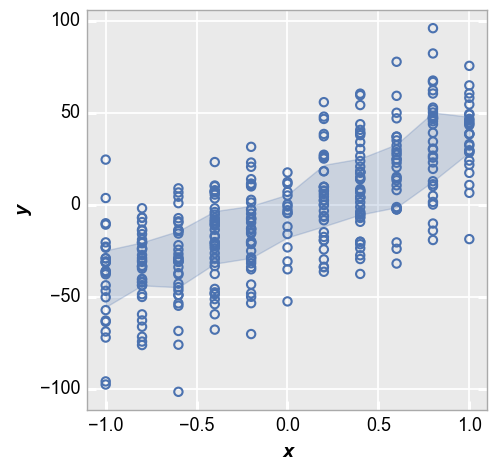

In [41]:
fcp.plot(df_interval, x='x', y='y', lines=False, perc_int=[0.25, 0.75])

Lastly we show the +/-2 sigma range of each data point:

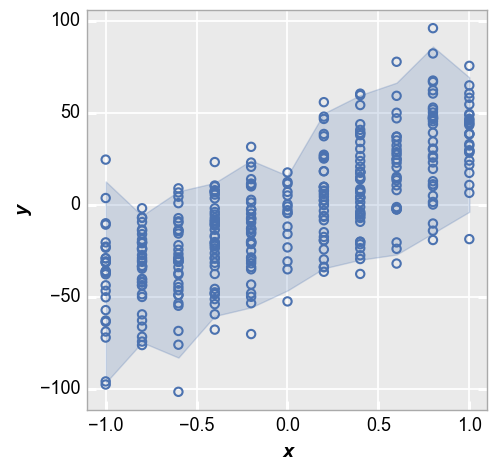

In [42]:
fcp.plot(df_interval, x='x', y='y', lines=False, nq_int=[-2, 2])

We can style the shaded interval region using kwargs that relate to the type of interval.  Here is an example for the `nq_int` option:

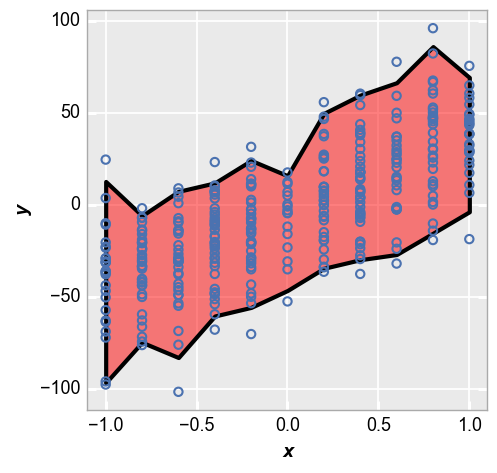

In [43]:
fcp.plot(df_interval, x='x', y='y', lines=False, nq_int=[-2, 2], 
         nq_int_fill_color='#FF0000', nq_int_fill_alpha=0.5, nq_int_edge_color='#000000', nq_int_edge_width=3, nq_int_edge_alpha=1)

### Control limits

<b>fivecentplots</b> can display upper and lower control limts for a plot via keywords ``ucl`` and ``lcl`` respectively.  This is a convenient way to show what a target values or target ranges for a dataset.

First we show an example with an upper control limit only.  Notice the region outside of the upper limit is shaded to show data points that fail to meet this target.

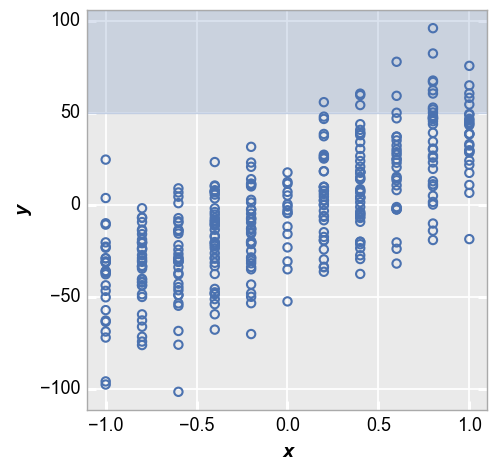

In [44]:
fcp.plot(df_interval, x='x', y='y', lines=False, ucl=50)

Now consider the case where we have both an upper and a lower control limit.  Again, notice that the ranges outside of the limits are shaded.  We will also enable a legend to make the meaning of the shaded region obvious.

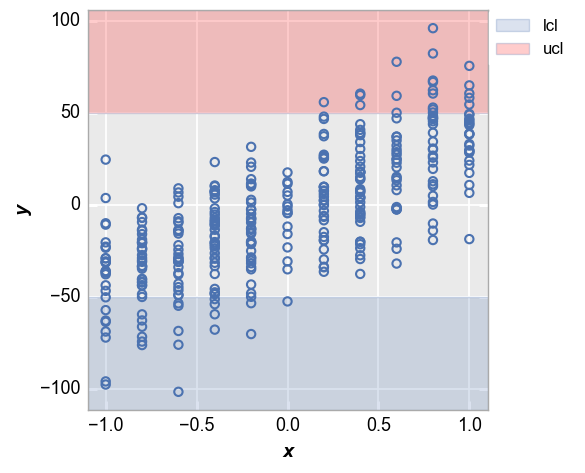

In [45]:
fcp.plot(df_interval, x='x', y='y', lines=False, ucl=50, lcl=-50, ucl_fill_color='#FF0000', legend=True)

We can invert the shading behavior to show points that fall within our target range using the keyword `control_limit_side="inside"` ("outside" is used by default).  If both ucl and lcl are defined, use kwargs for lcl to style the shaded region):

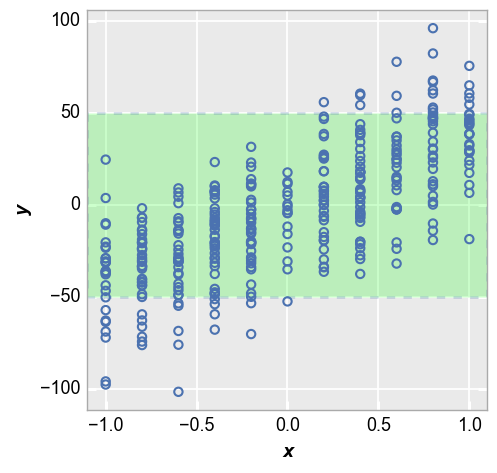

In [46]:
fcp.plot(df_interval, x='x', y='y', lines=False, ucl=50, lcl=-50, 
         control_limit_side='inside', lcl_fill_color='#00FF00', lcl_edge_width=2, lcl_edge_style='--')

### Reference line

We can add an arbitrary reference line to the plot using the keyword `ref_line`.  The value of this keyword is: (1) the name of one or more columns in the `DataFrame`; or (2) a pandas `Series` with the same number of rows as the `x` column.  These data will be plotted against the values for `x` so there must be a matching number of rows.

#### y=x reference

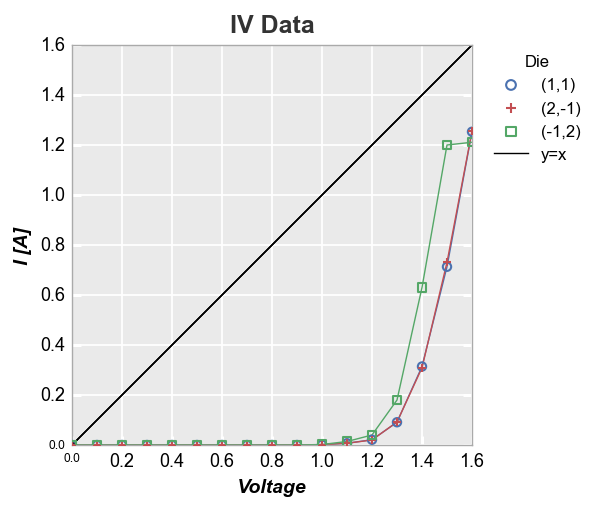

In [47]:
fcp.plot(df, x='Voltage', y='I [A]', title='IV Data', legend='Die', 
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25',
         ref_line=df['Voltage'], ref_line_legend_text='y=x', xmin=0, ymin=0, xmax=1.6, ymax=1.6)

We can also add multiple reference lines to a single plot:

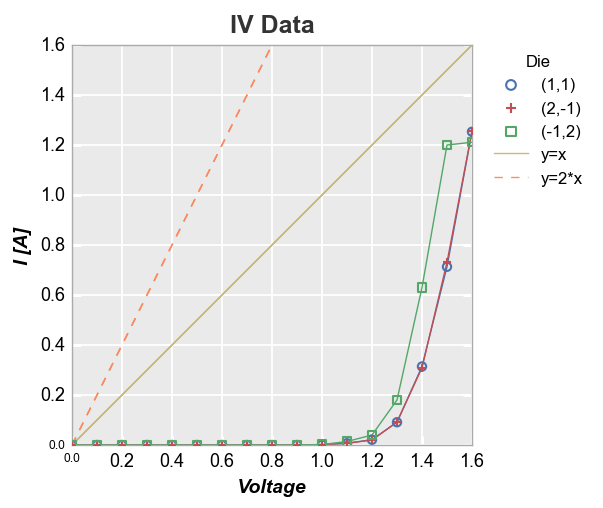

In [48]:
df['2*Voltage'] = 2*df['Voltage']
fcp.plot(df, x='Voltage', y='I [A]', title='IV Data', legend='Die', 
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25',
         xmin=0, ymin=0, xmax=1.6, ymax=1.6, 
         ref_line=['Voltage', '2*Voltage'], ref_line_legend_text=['y=x', 'y=2*x'], 
         ref_line_style=['-', '--'], ref_line_color=[5,6])

#### More complex calculation

Now let's use a 4-factor polynomial fit equation and add it as a reference line (notice that because we are not specifying an exisiting column in the DataFrame as the `ref_line` and we are not specifying `ref_line_legend_text`, the legend defaults to a generic label "Ref Line"): 

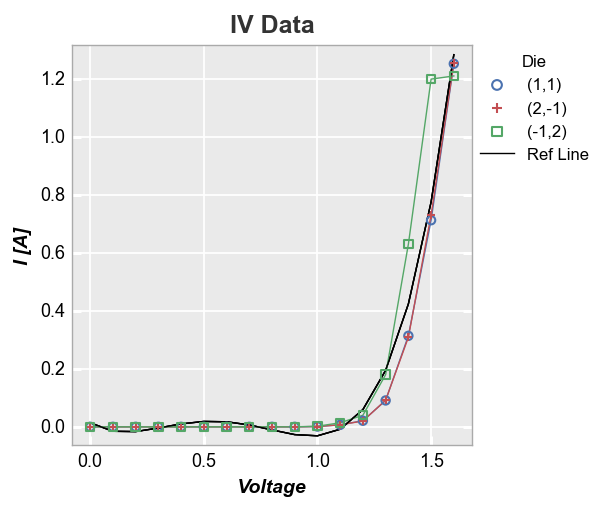

In [49]:
fcp.plot(df, x='Voltage', y='I [A]', title='IV Data', legend='Die',
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25',
         ref_line=1.555*df['Voltage']**4-3.451*df['Voltage']**3+2.347*df['Voltage']**2-0.496*df['Voltage']+0.014)